In [151]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier

In [77]:
dataframe_train=pd.read_csv("Desktop/dataset/loan_prediction_train.csv")

In [78]:
dataframe_train.shape

(614, 13)

In [80]:
dataframe_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [81]:
dataframe_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [82]:
dataframe_train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [83]:
dataframe_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

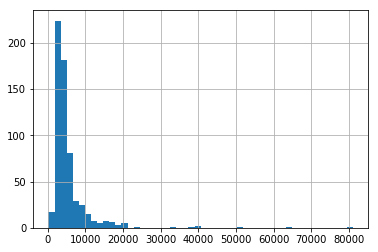

In [84]:
dataframe_train['ApplicantIncome'].hist(bins=50)

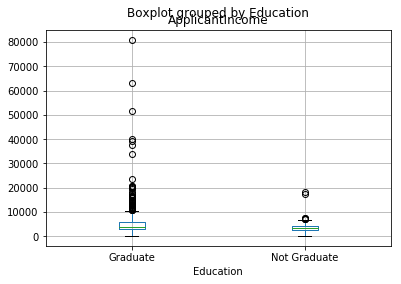

In [85]:
dataframe_train.boxplot(column='ApplicantIncome', by='Education')

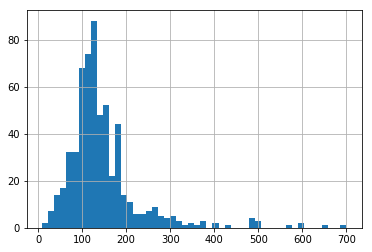

In [86]:
dataframe_train['LoanAmount'].hist(bins=50)

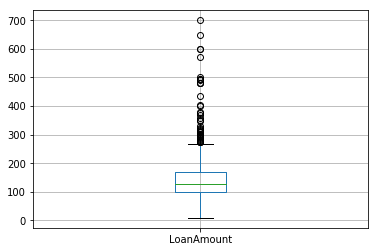

In [87]:
dataframe_train.boxplot(column='LoanAmount')

In [88]:
dataframe_train.apply(lambda x: sum(x.isnull()),axis =0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [89]:
dataframe_train['LoanAmount'].fillna(dataframe_train['LoanAmount'].mean(), inplace=True)

In [90]:
dataframe_train.apply(lambda x: sum(x.isnull()),axis =0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [91]:
dataframe_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [92]:
dataframe_train['Self_Employed'].fillna('No',inplace=True)

In [93]:
dataframe_train['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [94]:
dataframe_train['LoanAmount_log']=np.log(dataframe_train['LoanAmount'])

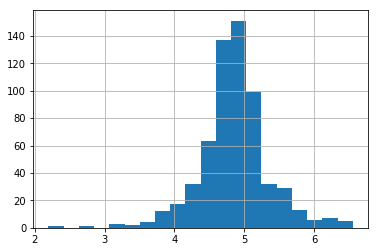

In [95]:
dataframe_train['LoanAmount_log'].hist(bins=20)

In [96]:
dataframe_train['TotalIncome']=dataframe_train['ApplicantIncome']+dataframe_train['CoapplicantIncome']

In [97]:
dataframe_train['TotalIncome_log']=np.log(dataframe_train['TotalIncome'])

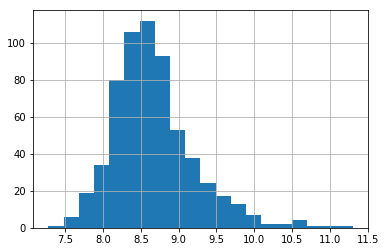

In [98]:
dataframe_train['TotalIncome_log'].hist(bins=20)

In [99]:
dataframe_train['Gender'].fillna('Male',inplace=True)

In [100]:
dataframe_train['Married'].fillna('Yes',inplace=True)

In [101]:
dataframe_train['Dependents'].fillna('0',inplace=True)

In [102]:
dataframe_train['Credit_History'].fillna('1',inplace=True)

In [110]:
var_mod=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for i in var_mod:
    dataframe_train[i]=le.fit_transform(dataframe_train[i])
    

In [146]:
def classification_model(model,data,predictors,outcomes):
    model.fit(data[predictors],data[outcomes])
    predict=model.predict(data[predictors])
    accuracy=accuracy_score(predict,data[outcomes])
    print("Accuracy is:{}".format(accuracy))
    
    kf=KFold(data.shape[0],n_folds=5)
    error=[]
    for train,test in kf:
        train_predictors=data[predictors].iloc[train,:]
        train_target=data[outcomes].iloc[train]
        model.fit(train_predictors,train_target)
        error.append(model.score(data[predictors].iloc[test,:],data[outcomes].iloc[test]))
    print("Cross Validation score is {}".format(np.mean(error)))
    model.fit(data[predictors],data[outcomes])
    
    

    
        
        

In [154]:
outcome_variable='Loan_Status'
model=RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)
predictor_var=['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model,dataframe_train,predictor_var,outcome_variable)


Accuracy is:0.8306188925081434
Cross Validation score is 0.8094762095161936
